In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into independent and dependent feature

X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
## Feature Engineering

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Geography']= label_encoder.fit_transform(X['Geography']) 
  
X['Geography'].unique() 

array([0, 2, 1])

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
X['Gender']= label_encoder.fit_transform(X['Gender']) 
  
X['Gender'].unique() 

array([0, 1])

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [16]:
# Splitting dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

In [17]:
##Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.16958176,  1.51919821, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.89294542,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.3131264 , -1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [19]:
X_test=scaler.transform(X_test)
X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [20]:
X_train.shape

(8000, 10)

In [21]:
# Now let's make the ANN!

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [22]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer
classifier.add(Dense(activation='relu',units = 10))

In [52]:
# Adding the first hidden layer
classifier.add(Dense(units = 7, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [53]:
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [54]:
# Compiling the ANN
# by default adam uses learning rate

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Create own leaning rate
# import tensorflow
# opt = tensorflow.keras.optimizers.Adamax(learning_rate=0.01)

In [55]:
## Early Stoping
import tensorflow as tf
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [56]:
 #Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 1000,callbacks = Early_Stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7916 - loss: 0.6567 - val_accuracy: 0.7955 - val_loss: 0.5585
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8089 - loss: 0.5248 - val_accuracy: 0.7955 - val_loss: 0.4870
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8056 - loss: 0.4762 - val_accuracy: 0.7955 - val_loss: 0.4499
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8023 - loss: 0.4587 - val_accuracy: 0.7955 - val_loss: 0.4286
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8428 - loss: 0.4271 - val_accuracy: 0.7955 - val_loss: 0.4124
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8335 - loss: 0.4183 - val_accuracy: 0.7955 - val_loss: 0.4038
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8359 - loss: 0.4159 - val_accuracy: 0.8432 - val_loss: 0.4000
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8375 - loss: 0.4113 - 

In [57]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


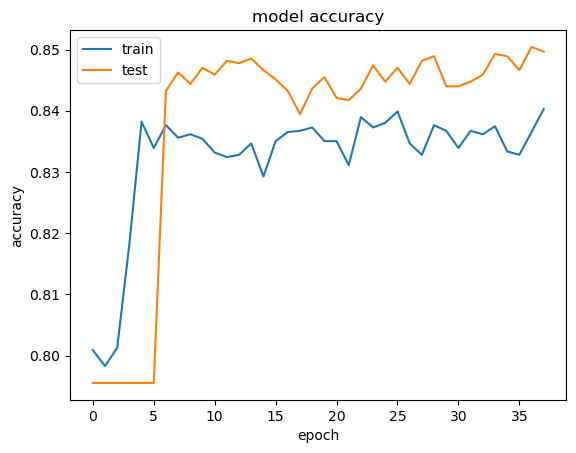

In [58]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

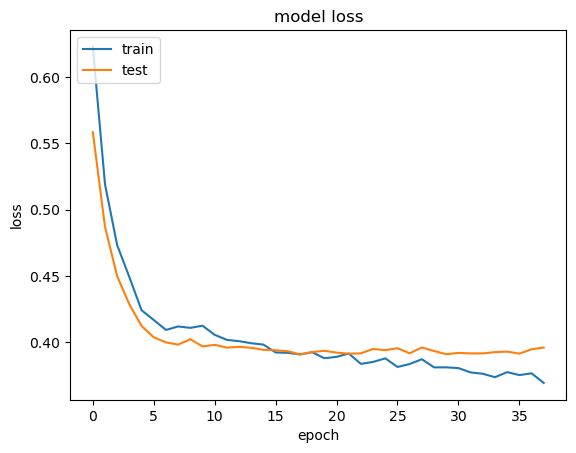

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [62]:
cm

array([[1513,   82],
       [ 224,  181]], dtype=int64)

In [63]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [64]:
score

0.847

In [51]:
## get the weights
classifier.get_weights()

[array([[ 0.19766496,  0.17373665,  0.5566624 , -0.29790273, -0.28482813,
         -0.10518792,  0.244846  , -0.01060392, -0.1666716 , -0.25451672],
        [ 0.42844763,  0.5175559 , -0.15912254, -0.3785812 ,  0.21164858,
         -0.7516712 ,  0.6724712 , -0.66403496,  0.1666169 , -0.13846725],
        [-0.01948126,  0.08111807,  0.10889924, -0.00989811,  0.18292545,
         -0.3976301 , -0.31470403,  0.31759128, -0.11455165, -0.04503153],
        [ 0.30591083, -0.30599794,  0.01355217, -0.38334587,  0.11655619,
         -0.8444345 , -0.6970614 , -0.29742175,  0.6446411 ,  0.9618919 ],
        [ 0.11101867, -0.07038323,  0.01851242,  0.04812427,  0.10758546,
         -0.19488794,  0.52958876,  0.13792469, -0.00975357, -0.1275598 ],
        [-0.3052038 , -0.5853512 , -0.09209623,  0.10162068,  0.33176717,
          0.375925  , -0.08654196, -0.39593604, -0.22989306, -0.38183215],
        [ 0.9539815 ,  0.16589   , -0.20623158,  0.04096032, -0.53209203,
         -0.30520293,  0.0752082